# Working with the embeddings of a pre-trained model

In this notebook are a few examples of working with the embedding vectors produced from a *anchor* tiles of a *study* dataset of 1000 tile-triplets (the model was trained on a different *training* dataset of 10000 tile-triplets).

The first part of the notebook is simply working with the embeddings. You can find the tile images them selves in `study/`. To create the plots and use the analysis tools in `convml_tt` (see further down in this notebook) you'll need to install [convml_tt](https://github.com/leifdenby/convml_tt) itself

## 1. Working with embedding vectors without `convml_tt`

In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import seaborn as sns
from pathlib import Path

xr.__version__

'0.15.0'

In [2]:
tileset_path = Path('../Nx256_s200000.0_N500study_pretrained')

In [3]:
da_emb = xr.open_dataarray(tileset_path/'fixednorm-stage-2.emb.nc')
da_emb.attrs['source_path'] = tileset_path/'study'
# the values are quite small, so let's scale them a bit
# (could instead retrain the model with a loss function that encourages larger values)
da_emb.values = 1.0e3 * da_emb.values
da_emb

<xarray.DataArray (tile_id: 1000, emb_dim: 100)>
array([[ 0.04439113, -0.00089889,  0.00184504, ...,  0.00341552,
        -0.01882763,  0.03102875],
       [ 0.03746718, -0.00390547, -0.01944061, ...,  0.04308116,
        -0.04589656, -0.00190157],
       [ 0.02817766, -0.00706374,  0.02045486, ..., -0.03190878,
         0.03008851,  0.03694958],
       ...,
       [-0.02969494, -0.0221094 , -0.01465371, ...,  0.00622156,
        -0.01242121, -0.01289532],
       [-0.02552627, -0.01335888, -0.01621911, ...,  0.01623332,
         0.00991325, -0.01937438],
       [-0.00403343, -0.0088293 ,  0.00245699, ...,  0.00189408,
        -0.01943776,  0.01783152]], dtype=float32)
Coordinates:
  * tile_id  (tile_id) int64 0 1 2 3 4 5 6 7 ... 992 993 994 995 996 997 998 999
  * emb_dim  (emb_dim) int64 0 1 2 3 4 5 6 7 8 9 ... 91 92 93 94 95 96 97 98 99
Attributes:
    source_path:  ../Nx256_s200000.0_N500study_pretrained/study
    tile_used:    anchor

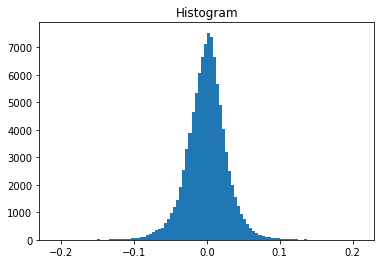

In [4]:
_ = da_emb.plot.hist(bins=100)

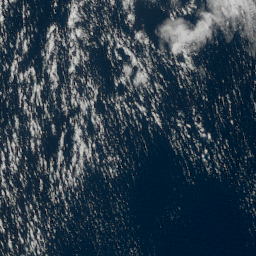

In [5]:
# looking a single tile
Image.open(tileset_path/'study'/'00000_anchor.png')

In [6]:
# and getting that tile's embedding vector
da_emb.sel(tile_id=0)

<xarray.DataArray (emb_dim: 100)>
array([ 4.4391125e-02, -8.9888996e-04,  1.8450355e-03, -6.0164458e-03,
        2.0701151e-02,  2.1681640e-02, -2.7999384e-02, -2.3057209e-02,
        1.4093546e-02,  1.2999076e-02, -3.8830586e-02, -1.3427618e-02,
       -1.0187007e-02, -3.2949174e-05,  3.9201220e-03, -1.6105158e-02,
       -2.0214036e-02, -1.5114783e-02, -3.3095010e-02, -9.3537528e-04,
        1.7944186e-03, -2.8299510e-03, -8.7389979e-04,  1.0653311e-02,
       -1.6204318e-02,  7.1233846e-03, -3.7952259e-02, -4.5835548e-03,
       -2.1458400e-02,  5.0105918e-03,  3.5772502e-02,  1.9776139e-02,
        6.3822265e-03,  2.5416896e-02,  1.6625155e-02,  6.6455886e-02,
       -1.7154999e-02,  1.8966673e-02, -1.6228655e-02, -1.9272652e-02,
       -7.3092380e-03, -3.1475175e-02, -5.3447913e-02,  8.3468035e-03,
       -2.7719542e-02,  1.1339995e-02,  4.8997100e-02,  6.5998831e-03,
        2.2729233e-02, -9.7206915e-03, -9.9574532e-03, -2.5565881e-02,
       -2.5408305e-02, -2.6329396e-02, -1.9917250e-02,  5.7192626e-03,
        8.6190701e-03, -9.9169407e-03, -1.2244207e-02,  9.9316821e-05,
        1.5269152e-02, -1.2203165e-02,  2.9216407e-02, -9.8317545e-03,
        5.8678415e-04,  1.8142760e-02, -3.4371624e-04, -3.1423181e-02,
       -1.7885890e-02,  2.5194699e-02, -1.5992392e-02,  3.0313386e-03,
       -8.3018783e-03, -3.0532014e-02,  4.0962186e-04,  7.5934366e-03,
       -2.8912093e-02,  3.1029245e-02, -5.7580620e-03, -1.1172626e-02,
        3.1297371e-02,  3.6845654e-02,  1.2499564e-02,  6.2227510e-02,
       -3.2458816e-02,  9.5142713e-03, -1.8922715e-02,  1.1735541e-02,
        2.7989358e-02,  1.4599682e-02,  1.8033730e-02, -2.2250824e-02,
        1.1086997e-02, -1.7894829e-02, -2.0103881e-02,  2.8860031e-03,
       -5.0356451e-02,  3.4155236e-03, -1.8827628e-02,  3.1028751e-02],
      dtype=float32)
Coordinates:
    tile_id  int64 0
  * emb_dim  (emb_dim) int64 0 1 2 3 4 5 6 7 8 9 ... 91 92 93 94 95 96 97 98 99
Attributes:
    source_path:  ../Nx256_s200000.0_N500study_pretrained/study
    tile_used:    anchor

(<xarray.DataArray ()>
 array(-0.1120913),
 <xarray.DataArray ()>
 array(0.1120913))

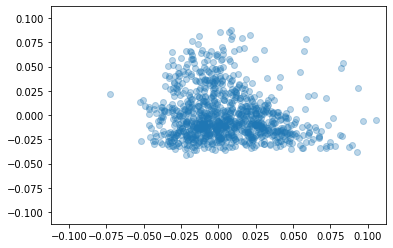

In [7]:
# Example of plotting first two components of embedding vector against each other

fig, ax = plt.subplots()
ax.scatter(da_emb.sel(emb_dim=0), da_emb.sel(emb_dim=1), alpha=0.3)
s = 4*da_emb.std()
ax.set_xlim(-s, s)
ax.set_ylim(-s, s)

# Using `convml_tt` to plot with tile-annotations, dendrogram, tile-grid, etc

With the `convml_tt` module there are a number of plotting tools available in `convml_tt.interpretation.plots` that can be helpful in understanding what the embeddings are representing and which specific tiles each refers to.

You'll need to have [convml_tt](https://github.com/leifdenby/convml_tt) installed to load the tiles and create the plots below

In [8]:
import convml_tt

from pathlib import Path

convml_tt.__version__

'0.5.0'

In [9]:
triplets = convml_tt.NPMultiImageList.from_folder(tileset_path/"study")
triplets

NPMultiImageList (1000 items)
[Image (3, 256, 256), Image (3, 256, 256), Image (3, 256, 256)],[Image (3, 256, 256), Image (3, 256, 256), Image (3, 256, 256)],[Image (3, 256, 256), Image (3, 256, 256), Image (3, 256, 256)],[Image (3, 256, 256), Image (3, 256, 256), Image (3, 256, 256)],[Image (3, 256, 256), Image (3, 256, 256), Image (3, 256, 256)]
Path: ../Nx256_s200000.0_N500study_pretrained/study

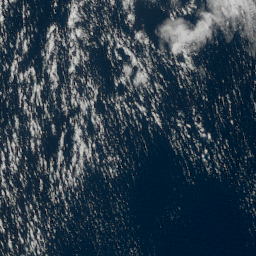

In [10]:
triplets[0][0]

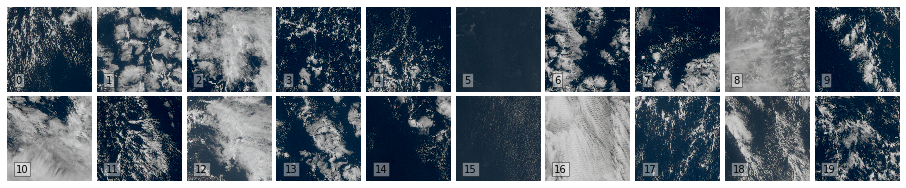

In [11]:
# plot the first 20 anchor tiles
convml_tt.interpretation.plots.grid_overview(triplets, points=20)

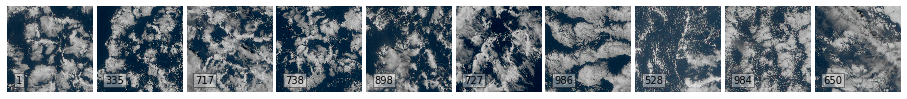

In [12]:
# plot the first 10 anchor tiles which are closest to anchor tile with index `1`
# illustrates plotting specific tiles by passing in a list of indecies to 
# convml_tt.interpretation.plots.grid_overview

ds = da_emb.to_dataset(name='emb')
ds['dist_to_1'] = np.sqrt(((da_emb.sel(tile_id=1) - da_emb)**2.).sum(dim='emb_dim'))

ds = ds.sortby('dist_to_1')
idxs = ds.isel(tile_id=slice(0, 10)).tile_id.values
convml_tt.interpretation.plots.grid_overview(triplets=triplets, points=idxs)

([<matplotlib.lines.Line2D at 0x1a2103cf50>,
 array([[ 0.021246, -0.020314],
        [-0.035783,  0.00457 ],
        [ 0.007675,  0.031542],
        [ 0.001305, -0.033126],
        [-0.037992, -0.006191],
        [ 0.029854,  0.000862],
        [ 0.023165,  0.006558],
        [-0.037796, -0.00143 ],
        [ 0.044387, -0.01787 ],
        [-0.020674, -0.005329]], dtype=float32))

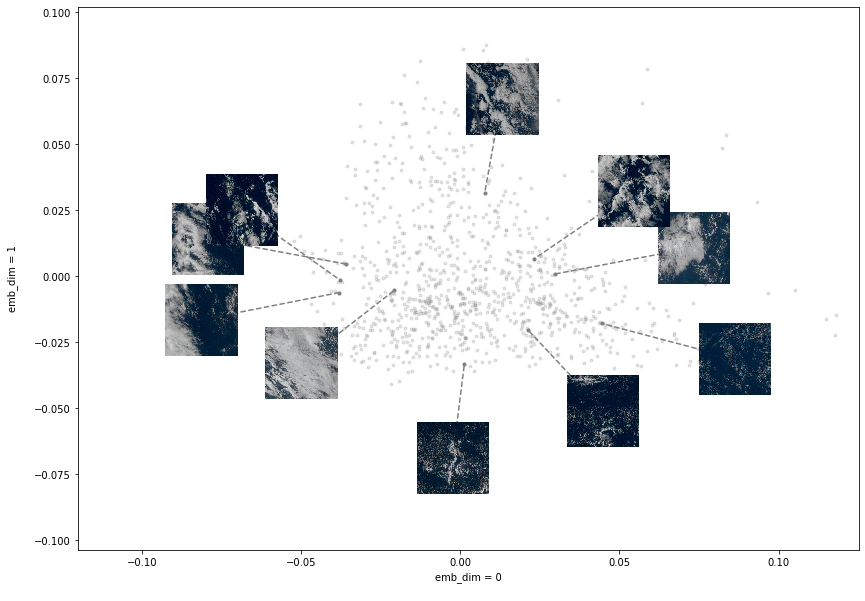

In [13]:
# create a scatter plot of the first two dimensions with tile-annotations of 10 random tiles
x = da_emb.sel(emb_dim=0)
y = da_emb.sel(emb_dim=1)
convml_tt.interpretation.plots.scatter_annotated(x=x, y=y, points=10)

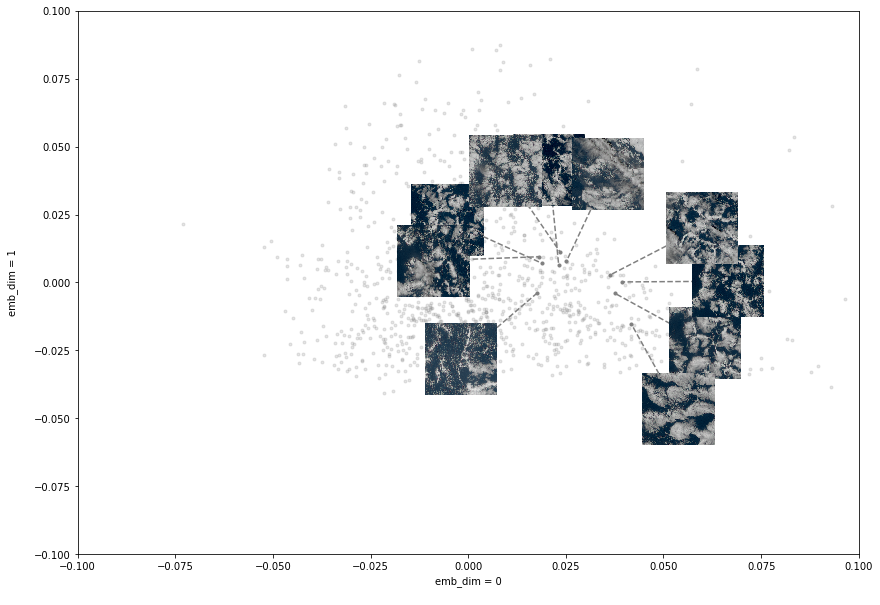

In [14]:
# create a scatter plot of the first two dimensions with tiles nearest to tile 1 above
fig, ax = plt.subplots(figsize=(14, 10))
x = da_emb.sel(emb_dim=0)
y = da_emb.sel(emb_dim=1)
ax.set_xlim(-0.1, 0.1)
ax.set_ylim(-0.1, 0.1)
_ = convml_tt.interpretation.plots.scatter_annotated(x=x, y=y, points=idxs, autopos_method='forces', ax=ax,
                                                     annotation_dist=2.0)

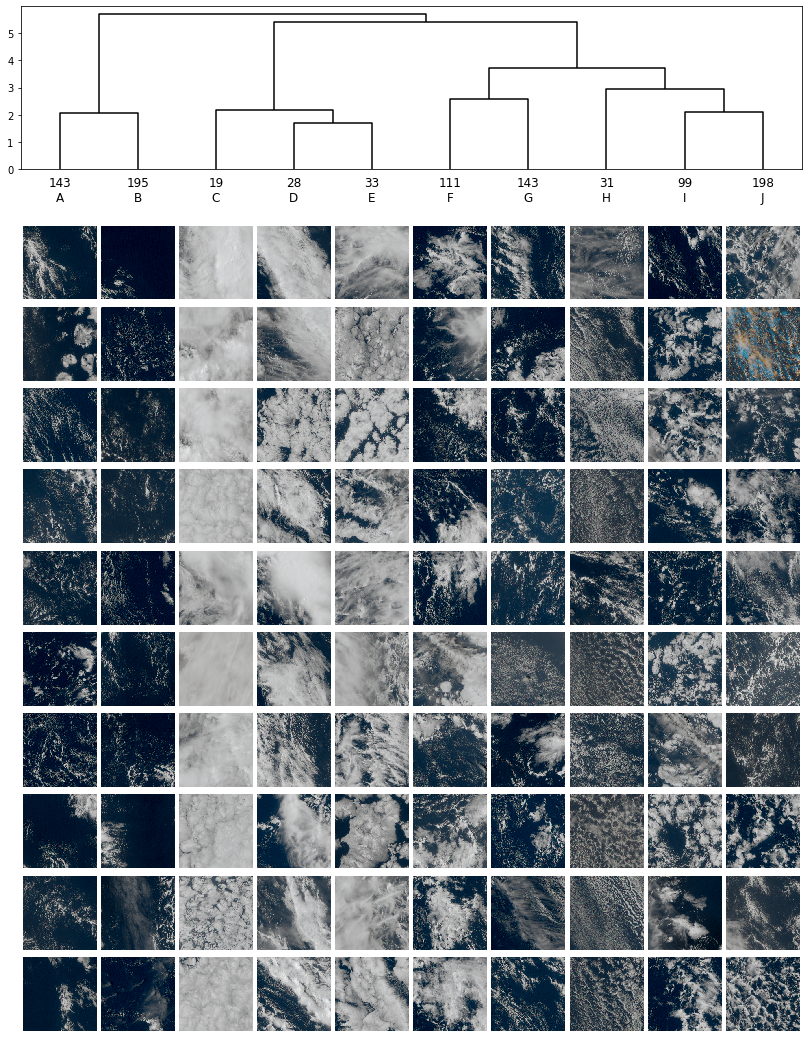

In [15]:
# make a dendrogram plot
_, arr_clusters = convml_tt.interpretation.plots.dendrogram(da_emb, return_clusters=True, label_clusters=True,
                                                            n_clusters_max=10)

In [16]:
# create a data array and add the cluster labels
ds = da_emb.to_dataset(name='emb')
ds['cluster'] = ('tile_id', arr_clusters)

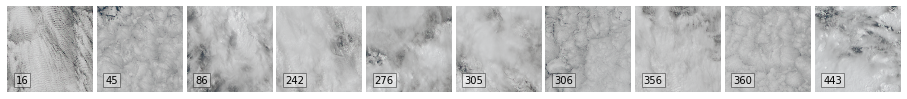

In [17]:
# checking that the cluster labels have been set: plot the first 10 tiles in cluster 'C'
idxs = ds.where(ds.cluster == 'C', drop=True).tile_id.values[:10]
convml_tt.interpretation.plots.grid_overview(triplets, points=idxs)